# Exploratary data analysis 

In [2]:
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbs
import geopandas as gpd
import folium 

In [3]:
from pyspark.sql import SparkSession

# Create a spark session with increased memory allocation
spark = (
    SparkSession.builder.appName("ADS Project1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.driver.memory", "8g")  # Set the driver memory to 8GB
    .config("spark.executor.memory", "8g")  # Set the executor memory to 8GB
    .getOrCreate()
)

24/08/28 14:59:40 WARN Utils: Your hostname, Hanshis-Laptop.local resolves to a loopback address: 127.0.0.1; using 100.94.176.147 instead (on interface en0)
24/08/28 14:59:40 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/28 14:59:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/08/28 14:59:41 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/08/28 14:59:41 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
24/08/28 14:59:41 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


In [4]:
spark.conf.set("spark.sql.parquet.compression.codec","gzip")

In [7]:
# Load the data
df = spark.read.parquet("../data/curated/tlc_data/first_cleaned.parquet/")

## Summary Statistics 

In [8]:
# Drop rows with any missing values
clean_df = df.dropna()

# Check the number of remaining rows
remaining_rows = clean_df.count()
total_rows = df.count()

print(f"Remaining rows after dropping missing values: {remaining_rows} out of {total_rows}")
# print percentage of rows remaining
print(f"Percentage of rows remaining: {remaining_rows/total_rows*100:.2f}%")


24/08/28 15:00:02 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Remaining rows after dropping missing values: 21959390 out of 22294112
Percentage of rows remaining: 98.50%


In [9]:
# print the schema
clean_df.printSchema()

root
 |-- DOLocationID: integer (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- pickup_date: date (nullable = true)
 |-- pickup_hour: integer (nullable = true)
 |-- dropoff_date: date (nullable = true)
 |-- dropoff_hour: integer (nullable = true)
 |-- VendorID: integer (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- trip_duration: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: boolean (nullable = true)
 |-- PUBorough: string (nullable = true)
 |-- DOBorough: string (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nulla

In [30]:
# summary statistics
clean_df.summary().show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+-----------------+------------------+------------------+-------------+-------------+-------------------+------------------+------------------+-------------------+-----------------+------------------+---------------------+------------------+--------------------+---------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+
|summary|      DOLocationID|      PULocationID|       pickup_hour|      dropoff_hour|           VendorID|   passenger_count|    trip_distance|     trip_duration|        RatecodeID|    PUBorough|    DOBorough|       payment_type|       fare_amount|             extra|            mta_tax|       tip_amount|      tolls_amount|improvement_surcharge|      total_amount|congestion_surcharge|ehail_fee|hourly_trip_count|  daily_trip_count|   

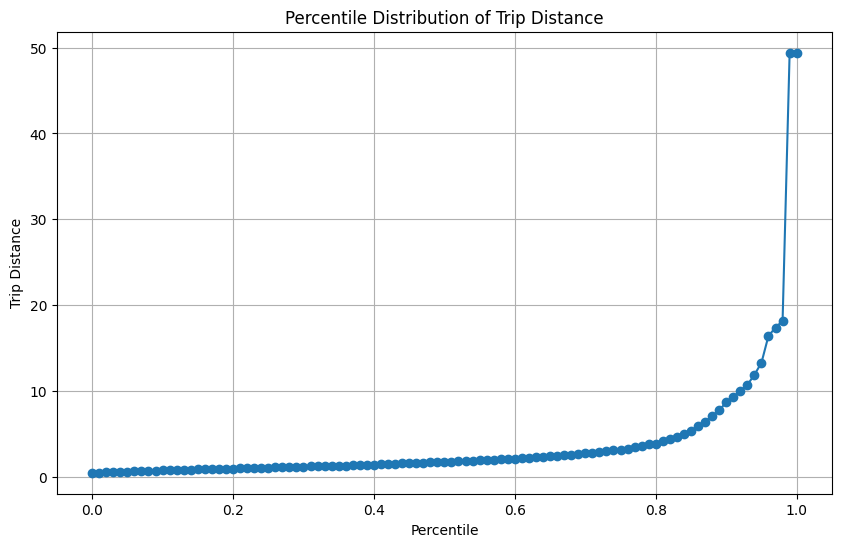

In [29]:
# Generate percentiles
percentiles = np.arange(0, 1.01, 0.01).tolist()  # Convert NumPy array to list

# Calculate approximate quantiles for trip_distance
percentile_trip_distance = clean_df.approxQuantile("trip_distance", percentiles, 0.01)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(percentiles, percentile_trip_distance, marker='o')
plt.xlabel('Percentile')
plt.ylabel('Trip Distance')
plt.title('Percentile Distribution of Trip Distance')
plt.grid(True)
plt.show()


## Distribution Analysis 

## Categorical Data Analysis

## Correlation Analysis 

## Bivariate Analysis